# 📝 Pattern Recognition & Biometrics. TP Classification

Par Omar Galarraga et Sonia Garcia

### LY Sovanleng, Thuo Menghor

Nous nous intéresserons à un cas de classification à 3 classes. Nous voudrions prédire l'espèce de manchot en se basant sur des mesures anatomiques (adapté de l'INRIA [s/d]).

Nous utiliserons pour cela une partie des données du [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/),
disponibles dans `./datasets/penguins_classification.csv`.

Chaque manchot de la base de données, appartient à un des trois espèces du genre Pygoscelis illustrées ci-dessous, à savoir : Adélie, Papou (*Gentoo*), et Jugulaire (*Chinstrap*). 

![Image of penguins](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/lter_penguins.png)

La classification se fera à partir de deux variables montrées dans la figure ci-dessous, à savoir : longueur et profondeur du bec (*bill/culmen length* et *bill/culmen depth* respectivement).

![Image of culmen](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/culmen_depth.png)

## Partie I. Classification linéaire : Classification bayésienne naïve

Commençons par charger les données et faire un peu d'exploration...

In [2]:
import pandas

##Si besoin de Google Colab
#from google.colab import files
#files.upload()
#PenguinData = pandas.read_csv("penguins_classification.csv")

PenguinData = pandas.read_csv("penguins_classification.csv")
PenguinData[:]

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
...,...,...,...
337,55.8,19.8,Chinstrap
338,43.5,18.1,Chinstrap
339,49.6,18.2,Chinstrap
340,50.8,19.0,Chinstrap


Regardons le nombre d'exemples par espèce...

In [3]:
PenguinData["Species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

* I.1) Calculer la probabilité *a priori* pour chaque classe

In [4]:
#Ecrivez votre code ici
PenguinData["Species"].value_counts(normalize=True)

Adelie       0.441520
Gentoo       0.359649
Chinstrap    0.198830
Name: Species, dtype: float64

Regardons les histogrammes des variables d'entrée...

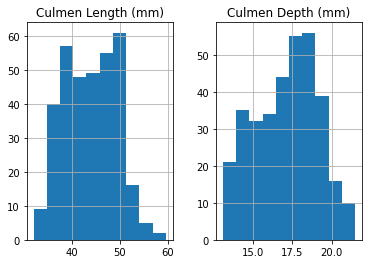

In [5]:
%matplotlib inline
_ = PenguinData.hist()

Maintenant regardez la distribution des variables selon les classes.
* I.2) Peut-on trouver des séparateurs linéaires entre les classes ?

    ***Réponse :*** 
D'après le scatter plot ci-dessous, il est possible que l'on trouve des séparateurs linéaires entre les classes.

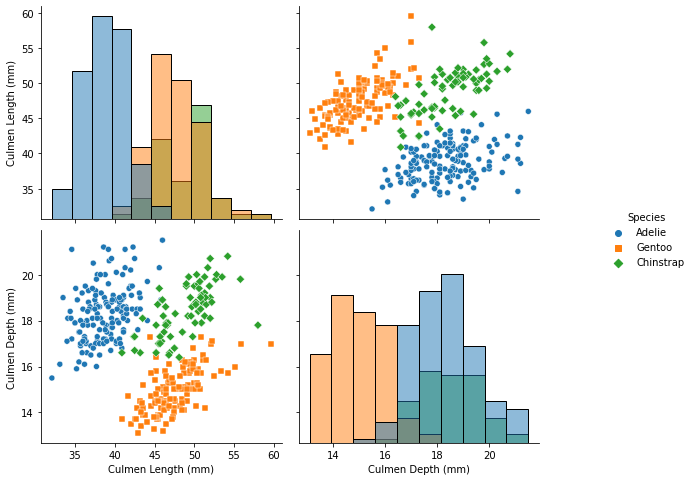

In [6]:
import seaborn as sns
pairplot_figure = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="hist", markers = ["o", "s", "D"])
pairplot_figure.fig.set_size_inches(10, 7)

Maintenant nous allons refaire le graphique précédent en remplaçant les histogrammes par des estimations par noyau des fonctions de densité de probabilité par classe. 
* I.3) Peut-on classifier avec une seule variable ?
  
    ***Réponse :***  Selon les graphiques de distribution de chaque variable, on ne peut pas classifier avec une seule variable.
  
* I.4) Proposez une règle de décision en combinant les deux variables.

    ***Réponse :*** 


La règle de décision pour classifier 2 classes est basé sur le théorème de Bayes:

$$\mathbb{P}(c_i|x) = \dfrac{\mathbb{P}(x|c_i)\mathbb{P}(c_i)}{\mathbb{P}(x)}$$
L’observation 𝑥 sera affecté à la classe $c_𝑎$ avec :
$$a = \begin{cases} 
            1 & \text{si} \ \mathbb{P}(c_1|x)>\mathbb{P}(c_2|x)\\
            2 & \text{si} \ \mathbb{P}(c_1|x)<\mathbb{P}(c_2|x)\\
            1 \ \text{ou} \ 2 & \text{si} \ \mathbb{P}(c_1|x)=\mathbb{P}(c_2|x)
      \end{cases}$$
Avec le théorème de Bayes, on converte ces conditions en:
$$a = \begin{cases} 
            1 & \text{si} \ \mathbb{P}(x|c_1)\mathbb{P}(c_1)>\mathbb{P}(x|c_2)\mathbb{P}(c_2)\\
            2 & \text{si} \ \mathbb{P}(x|c_1)\mathbb{P}(c_1)<\mathbb{P}(x|c_2)\mathbb{P}(c_2)\\
            1 \ \text{ou} \ 2 & \text{si} \ \mathbb{P}(x|c_1)\mathbb{P}(c_1)=\mathbb{P}(x|c_2)\mathbb{P}(c_2)
      \end{cases}$$

En l'appliquant sur ce cas, selon les scatterplots, on doit séparer les Adelie des Chinstrap et séparer les Chinstrap des Gentoo, donc on a les règles:
$$a = \begin{cases} 
            Adelie & \ \text{si}\,\mathbb{P}((Culmen Length, Culmen Depth)|Adelie)\mathbb{P}(Adelie)>\mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)\\
            Chinstrap & \ \text{si}\,\mathbb{P}((Culmen Length, Culmen Depth)|Adelie)\mathbb{P}(Adelie)<\mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)\\
            Chinstrap & \ \text{si}\,\mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)>\mathbb{P}((Culmen Length, Culmen Depth)|Gentoo)\mathbb{P}(Gentoo)\\
            Gentoo & \ \text{si}\,\mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)<\mathbb{P}((Culmen Length, Culmen Depth)|Gentoo)\mathbb{P}(Gentoo)
       \end{cases}$$

Donc, on a besoin deux droites pour séparer les espèces :
- une qui sépare les Adelie des Chinstrap
- une autre qui sépare les Chinstrap des Gento

Pour déterminer les paramètres des équations des droites, il faudrait néanmoins résoudre le système suivant :

$$\begin{cases} 
       \mathbb{P}((Culmen Length, Culmen Depth)|Adelie)\mathbb{P}(Adelie)=\mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)\\
       \mathbb{P}((Culmen Length, Culmen Depth)|Chinstrap)\mathbb{P}(Chinstrap)=\mathbb{P}((Culmen Length, Culmen Depth)|Gentoo)\mathbb{P}(Gentoo)
   \end{cases}$$

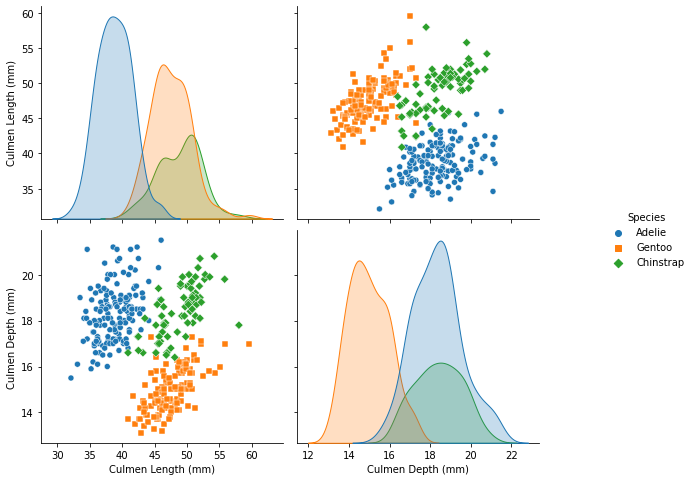

In [7]:
import seaborn as sns
pairplot_figure2 = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="kde", markers = ["o", "s", "D"])
pairplot_figure2.fig.set_size_inches(10, 7)

* I.5) Créez un classifieur bayésien naïf, à partir des données *data_train* et *target_train* définies ci-dessous, pour prédire l'espèce des manchots (Piste : donnez la classe qui maximise la probabilité $ P(c/x) $)

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], PenguinData[["Species"]], test_size=0.3, shuffle=True, random_state=42)

#Ecrivez votre code ici
from sklearn.naive_bayes import GaussianNB
mdl = GaussianNB().fit(data_train,target_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* I.6) Faites des prédictions pour tous les exemples dans *data_test* et comparez avec les vraies classes dans *target_test*. Calculez le taux d'erreur du classifieur.

In [9]:
#Ecrivez votre code ici
from sklearn.metrics import accuracy_score
predict_test = mdl.predict(data_test)
accuracy_test = accuracy_score(target_test,predict_test)
error = 1 - accuracy_test
print(f'Accuracy: {accuracy_test} ')
print(f'Error: {error} ')

Accuracy: 0.941747572815534 
Error: 0.058252427184465994 


* I.7) Calculez le risque d'erreur minimale du classifieur (vous pouvez d'abord trouver les seuils analytiquement). Comparez avec le taux d'erreur calculé précédemment.


***Réponse :***
D'abord, on va trouver les seuils analytiquement:

Soit $c_1$ et $c_2$ sont deux classes. Pour déterminer le seuil entre deux classes $c_1$ et $c_2$, on doit trouver le point $x$ vérifiant $\mathbb{P}(c_1|x) = \mathbb{P}(c_2|x)$:

Par la formule de Bayes: 
$$\frac{\mathbb{P}(x|c_1)\mathbb{P}(c_1)}{\mathbb{P}(x)} = \frac{\mathbb{P}(x|c_2)\mathbb{P}(c_2)}{\mathbb{P}(x)}$$

On a:
$$\mathbb{P}(x|c_1)\mathbb{P}(c_1) = \mathbb{P}(x|c_2)\mathbb{P}(c_2)\\
\Leftrightarrow\frac{1}{\sqrt{2\pi \sigma_{c_1}^2}}exp(-\frac{1}{2}(\frac{x-\mu_{c_1}}{\sigma_{c_1}})^2)\mathbb{P}(c_1) = \frac{1}{\sqrt{2\pi \sigma_{c_2}^2}}exp(-\frac{1}{2}(\frac{x-\mu_{c_2}}{\sigma_{c_2}})^2)\mathbb{P}(c_2)\\
\Leftrightarrow-\frac{1}{2}(\frac{x-\mu_{c_1}}{\sigma_{c_1}})^2 + \frac{1}{2}(\frac{x-\mu_{c_2}}{\sigma_{c_2}})^2 = ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})\\
\Leftrightarrow-\frac{1}{\sigma_{c_1}^2}(x^2-2\mu_{c_1}x + \mu_{c_1}^2) + \frac{1}{\sigma_{c_2}^2}(x^2-2\mu_{c_2}x + \mu_{c_2}^2) = 2ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})\\
\Leftrightarrow(\frac{1}{\sigma_{c_2}^2}-\frac{1}{\sigma_{c_1}^2})x^2 + 2(\frac{\mu_{c_1}}{\sigma_{c_1}^2} - \frac{\mu_{c_2}}{\sigma_{c_2}^2})x + (\frac{\mu_{c_2}^2}{\sigma_{c_2}^2} - \frac{\mu_{c_1}^2}{\sigma_{c_1}^2} - 2ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})) = 0$$

Pour obtenir le seuil, on va solver le $x$ dans l'équation du second degré ci-dessus par la fonction "root" en Numpy. 

En théorie, nous devons calculer le seuil pour toutes les paires parmi 3 classes. Cependant, selon la répartition des 3 classes, il n'est pas nécessaire de faire les calculs pour:

 - (Adelie, Chinstrap) avec la variable Culmen Depth
 - (Chinstrap, Gentoo) avec la variable Culmen Length

car leurs distributions sont confondues.

Pour calculer le risque d'erreur minimale entre deux classes $c_1$ et $c_2$ avec le seuil $x_0$, nous utilisons l'equation suivante:

$$\mathbb{P}(Erreur) = \mathbb{P}(c_2)\int\limits_{-\infty}^{x_0} \mathbb{P}(x|c_2)dx + \mathbb{P}(c_1)\int\limits_{x_0}^{+\infty} \mathbb{P}(x|c_1)dx$$ 

In [10]:
#Ecrivez votre code ici

import numpy as np

# Fonction qui resoud l'équation du second degré
def equa_solve(mu1, mu2, sigma1, sigma2, p1, p2) :

    a = 1/(sigma2**2) - 1/(sigma1**2)
    b = 2 * (mu1/(sigma1**2) - mu2/(sigma2**2))
    c = (mu2**2)/(sigma2**2) - (mu1**2)/(sigma1**2) - 2 * np.log((p2 * sigma1)/(p1 * sigma2))

    return np.roots([a, b, c])

# les moyennes et écarts-type associées à chaque classe et variable dans la modèle
mu = mdl.theta_ # ordre: Adelie, Chinstrap, Gentoo
sigma = np.sqrt(mdl.var_) # ordre: Adelie, Chinstrap, Gentoo

# Calculer la probabilités de trois classes Adelie, Gentoo, Chinstrap (P(c_i))
p = PenguinData["Species"].value_counts()/PenguinData["Species"].shape[0]
a = p[0] # P(Adelie)
g = p[1] # P(Gentoo)
c = p[2] # P(Chinstrap)

# equa_solve() retourne toutes les solutions possibles de l'équation
# On a choisit uniquement celle qui peuvent correspondre à des seuils (grâce aux histogrammes plus haut)

# Calculer les seuils pour la variable Culmen length
# le seuil entre Adelie et Chinstrap
length_ac = equa_solve(mu[0, 0], mu[1, 0], sigma[0, 0], sigma[1, 0], a, c)[0]
# le seuil entre Adelie et Gentoo
length_ag = equa_solve(mu[0, 0], mu[2, 0], sigma[0, 0], sigma[2, 0], a, g)[0]

# Calculer les seuils pour la variable Culmen depth
# le seuil entre Adelie et Gentoo
depth_ag = equa_solve(mu[0, 1], mu[2, 1], sigma[0, 1], sigma[2, 1], a, g)[0]
# le seuil entre Chinstrap et Gentoo
depth_cg = equa_solve(mu[1, 1], mu[2, 1], sigma[1, 1], sigma[2, 1], c, g)[0]

print("Pour Culmen Length :")
print("Le seuil entre Adelie et Chinstrap =", length_ac)
print("Le seuil entre Adelie et Gentoo =", length_ag)

print("Pour Culmen Depth :")
print("Le seuil entre Adelie et Gentoo =", depth_ag)
print("Le seuil entre Chinstrap et Gentoo = ", depth_cg, "\n")

Pour Culmen Length :
Le seuil entre Adelie et Chinstrap = 43.730522291418154
Le seuil entre Adelie et Gentoo = 42.92113737043901
Pour Culmen Depth :
Le seuil entre Adelie et Gentoo = 16.54057790371113
Le seuil entre Chinstrap et Gentoo =  16.841016417761224 



## Partie II. Classification non linéaire avec réseaux de neurones

Nous appliquerons un réseau de neurones type Perceptron Multicouche (PMC) ou *feedforward neural network* à la même problématique de classification.

Nous commencerons par le prétraitement des données. Afin que les entrées aient la même importance dans le modèle, il est impératif de normaliser les données. Dans ce cas, nous allons centrer et réduire les entrées (soustraire la moyenne et diviser par l'écart-type). 
De la même façon, nous devons convertir les étiquettes en variables quantitatives pour pouvoir insérer ces données dans le modèle neuronal. Nous utiliserons un codage en vecteurs binaires, comme ci-dessous :


$$
\begin{array}{ccc}
Adelie & \rightarrow & \left(1\,0\,0\right)^T\\
Gentoo & \rightarrow & \left(0\,1\,0\right)^T\\
Chinstrap & \rightarrow & \left(0\,0\,1\right)^T\\
\end{array}
$$

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

input_preprocessor = StandardScaler()
target_preprocessor = OneHotEncoder(sparse=False)

data = input_preprocessor.fit_transform(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']])
target = target_preprocessor.fit_transform(PenguinData[['Species']])

normdf = pandas.DataFrame(np.concatenate((PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], data), axis=1), columns=['Var1', 'Var2', 'Var1 norm', 'Var2 norm'])
print("Données d'entrée normalisées")
print(normdf[:10])
print("Sortie désirée")
print(pandas.DataFrame(target, columns=['Adelie', 'Gentoo', 'Chinstrap']))

Données d'entrée normalisées
   Var1  Var2  Var1 norm  Var2 norm
0  39.1  18.7  -0.884499   0.785449
1  39.5  17.4  -0.811126   0.126188
2  40.3  18.0  -0.664380   0.430462
3  36.7  19.3  -1.324737   1.089724
4  39.3  20.6  -0.847812   1.748985
5  38.9  17.8  -0.921185   0.329038
6  39.2  19.6  -0.866155   1.241861
7  34.1  18.1  -1.801661   0.481175
8  42.0  20.2  -0.352544   1.546135
9  37.8  17.1  -1.122961  -0.025949
Sortie désirée
     Adelie  Gentoo  Chinstrap
0       1.0     0.0        0.0
1       1.0     0.0        0.0
2       1.0     0.0        0.0
3       1.0     0.0        0.0
4       1.0     0.0        0.0
..      ...     ...        ...
337     0.0     1.0        0.0
338     0.0     1.0        0.0
339     0.0     1.0        0.0
340     0.0     1.0        0.0
341     0.0     1.0        0.0

[342 rows x 3 columns]


Maintenant nous construisons un PMC à une seule couche cachée avec $m = 2$ neurones
* II.1) Quelle est la taille de la *couche d'entrée* ?
  
    ***Réponse :*** La taille de la couche d'entrée est 2.

* II.2) Quelle est la taille de la couche de sortie ?
  
    ***Réponse :*** La taille de la couche de sortie est 3.

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
set_config(display='diagram')
mlpmodel

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=500,
              solver='lbfgs')

Pour pouvoir entraîner le PMC et tester sa capacité de généralisation, il faut : 
* a) Après avoir changé aléatoirement l'ordre des observations, séparer les données en ensembles d'apprentissage ($70\%$) et de test ($30\%$)
* b) Entraîner le modèle avec les données d'apprentissage
* c) Prédire les valeurs pour les données de test  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)

#Training
mlpmodel.fit(X_train, y_train)

pred_tr = mlpmodel.predict(X_train)
pred_tr_label = target_preprocessor.inverse_transform(pred_tr) #Décodage des vecteurs binaires
train_label = target_preprocessor.inverse_transform(y_train)

#Test
pred_test = mlpmodel.predict(X_test)
pred_test_label = target_preprocessor.inverse_transform(pred_test)
test_label = target_preprocessor.inverse_transform(y_test)
table_test = pandas.DataFrame(np.concatenate((pred_test_label,test_label), axis=1), columns=['Prédictions', 'Vraies'])
table_test[65:75]

,Prédictions,Vraies
65,Chinstrap,Adelie
66,Adelie,Adelie
67,Adelie,Adelie
68,Adelie,Adelie
69,Adelie,Adelie
70,Adelie,Adelie
71,Adelie,Adelie
72,Chinstrap,Chinstrap
73,Adelie,Chinstrap
74,Chinstrap,Chinstrap


Combien d'erreurs de classification se trouvent dans le tableau ci-dessus ?

* Calcul de la performance du modèle :

In [14]:
#Performance training
acc_tr = (pred_tr_label == train_label).mean()

#Performance test
acc_test = (pred_test_label == test_label).mean()

print(f"La performance en apprentissage est de {acc_tr:.4f}")
print(f"La performance en test est de {acc_test:.4f}")

La performance en apprentissage est de 0.9707
La performance en test est de 0.9806


Nous avons testé la performance du modèle pour un seul ensemble de test. Afin d'avoir une meilleure estimation de la performance du modèle, nous devons réaliser une validation croisée.
* II.3) Réalisez une validation croisée de type K-fold avec $K=10$ (n'oubliez pas de *mélanger* les données avant). Calculer la moyenne et l'écart-type des performances d'apprentissage et de test.

In [15]:
#Ecrivez votre code ici

from sklearn.model_selection import cross_validate, KFold

m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)

kf = KFold(n_splits=10, shuffle=True)
cv = cross_validate(mlpmodel, data, target, cv=kf, return_train_score=True)

print(f"Moyenne des performance en apprentissage: {np.mean(cv['train_score'])}")
print(f"Écart-type des performance en apprentissage: {np.std(cv['train_score'])}")

print(f"Moyenne des performance en test: {np.mean(cv['test_score'])}")
print(f"Écart-type des performance en test: {np.std(cv['test_score'])}")


Moyenne des performance en apprentissage: 0.967185583146495
Écart-type des performance en apprentissage: 0.006729467484632523
Moyenne des performance en test: 0.9590756302521009
Écart-type des performance en test: 0.0234514012925273


Nous avons arbitrairement choisi $m=2$ pour le nombre de neurones dans la couche cachée. Le nombre de neurones cachés optimal $m_{opt}$ se trouve de manière empirique en faisant varier la valeur de $m$ et en évaluant la performance.
* II.4) Trouvez $m_{opt}$ dans l'intervalle  $\left[2, 10\right]$ en réalisant une validation croisée type *10-fold* pour chaque valeur de $m$. Quelle est la performance du modèle avec $m=m_{opt}$ ?

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


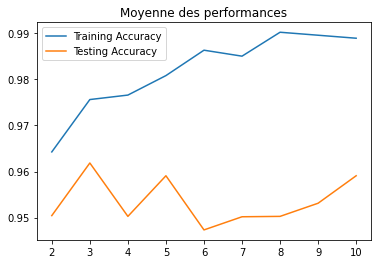

Avec les performances de test:
- m_opt = 3
- La moyenne des performances de la validation croisée de m_opt = 0.9618487394957983


In [16]:
#Ecrivez votre code ici
import matplotlib.pyplot as plt
acc_train = []
acc_test = []
m_list = list(range(2,11))
kf = KFold(n_splits=10, shuffle=True)

for i in m_list:
    mlpmodel = MLPClassifier(hidden_layer_sizes=(i, ), activation="logistic", solver="lbfgs", max_iter=1000)
    cv = cross_validate(mlpmodel, data, target, cv=kf, return_train_score=True)
    acc_train.append(np.mean(cv['train_score']))
    acc_test.append( np.mean(cv['test_score']))

plt.plot(m_list,acc_train)
plt.plot(m_list,acc_test)
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.title('Moyenne des performances')
plt.show()

print("Avec les performances de test:")
m_opt = m_list[acc_test.index(max(acc_test))]
print('- m_opt =', m_opt)
print('- La moyenne des performances de la validation croisée de m_opt =', max(acc_test))


Enfin, nous aimerions connaître l'effet de la taille de l'ensemble d'apprentissage sur la performance du modèle. 
* II.5) Calculez la performance en fonction de la taille de l'ensemble d'apprentissage pour $n \in \left\{10, 50,  100, 150, 200, 250, 300, 342\right\}$ (Validation croisée *10-fold* pour $m=m_{opt}$ et chaque valeur de $n$). 
* II.6) Montrez la courbe d'apprentissage (vous pouvez utiliser matplotlib.pyplot.plot pour montrer les performances d'apprentissage et de test sur le même graphique). A partir de quelle valeur de $n$ le modèle atteint-il son potentiel maximal ($Acc\_test \approx Acc\_train$) ?  

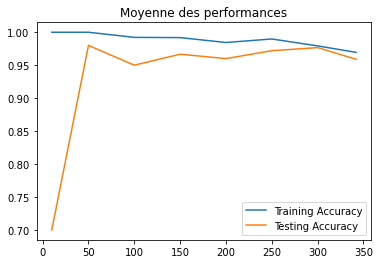

In [17]:
from sklearn.utils import shuffle

n_list = [10, 50, 100, 150, 200, 250, 300, 342]
acc_train = []
acc_test = []

# Concatenate data and target for shuffling
data_and_target = pandas.DataFrame(
    {
        'data0': data[:,0], 
        'data1': data[:,1],
        'target0': target[:,0],
        'target1': target[:,1],
        'target2': target[:,2]
    }
)

for n in n_list:
    shuffled_data_and_target = shuffle(data_and_target, n_samples=n)
    new_data = shuffled_data_and_target.iloc[:,[0,1]]
    new_target = shuffled_data_and_target.iloc[:,[2,3,4]]

    mlpmodel = MLPClassifier(hidden_layer_sizes=(m_opt, ), activation="logistic", solver="lbfgs", max_iter=1000)
    kf = KFold(n_splits=10, shuffle=True)
    cv = cross_validate(mlpmodel, new_data, new_target, cv=kf, return_train_score=True)

    acc_train.append(np.mean(cv['train_score']))
    acc_test.append(np.mean(cv['test_score']))

# Plot performance
plt.title('Moyenne des performances')
plt.plot(n_list, acc_train)
plt.plot(n_list, acc_test)
plt.legend(['Training Accuracy','Testing Accuracy'])

D'après le graphique ci-dessus, à partir de $n=150$ le modèle atteint son potentiel maximal ($Acc\_test \approx Acc\_train$). Mais ce n'est pas toujours vrai puisque les ensembles d'apprentissage et de test sont randomisés.